In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv("MetrailDataset.csv")

In [46]:
df.head()

,Month,Travellers('000)
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             159 non-null    object 
 1   Travellers('000)  148 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.6+ KB


In [48]:
df.describe()

,Travellers('000)
count,148.000000
mean,1837.547297
std,177.907923
min,1376.000000
25%,1718.250000
50%,1843.500000
75%,1976.250000
max,2236.000000


In [49]:
df.isnull().sum()

Month                0
Travellers('000)    11
dtype: int64

In [50]:
df.columns = {"Month", "Target"}

In [51]:
df.head()

,Month,Target
0,Jan-91,1724.0
1,Feb-91,1638.0
2,Mar-91,1987.0
3,Apr-91,1825.0
4,May-91,NaN


In [52]:
df["Month"] = pd.to_datetime(df["Month"], format='%b-%y')

In [53]:
df.set_index("Month")

,Target
Month,
1991-01-01,1724.0
1991-02-01,1638.0
1991-03-01,1987.0
1991-04-01,1825.0
1991-05-01,NaN
...,...
2003-11-01,2091.0
2003-12-01,2155.0
2004-01-01,1848.0


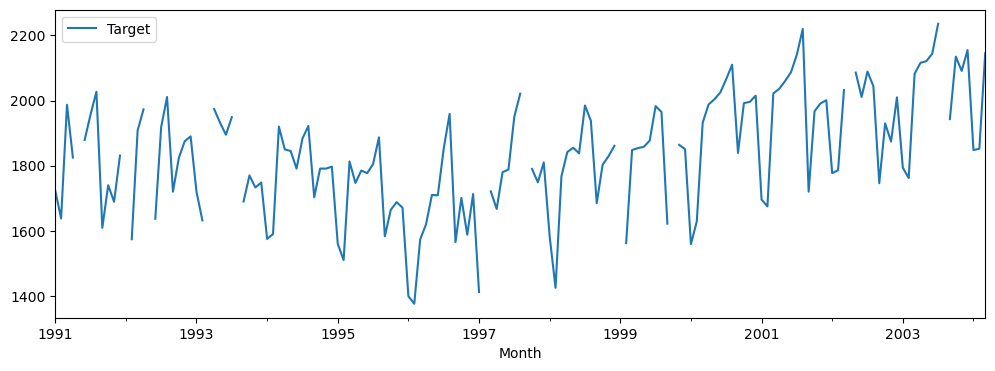

In [54]:
df.plot(figsize=(12,4), x = 'Month', y = 'Target')
plt.legend(loc="best")
plt.show(block=False)

In [55]:
df.describe()

,Month,Target
count,159,148.000000
mean,1997-07-31 23:14:43.018867968,1837.547297
min,1991-01-01 00:00:00,1376.000000
25%,1994-04-16 00:00:00,1718.250000
50%,1997-08-01 00:00:00,1843.500000
75%,2000-11-16 00:00:00,1976.250000
max,2004-03-01 00:00:00,2236.000000
std,NaN,177.907923


In [60]:
df["Target_Mean"] = df["Target"].fillna(df["Target"].mean())

In [61]:
df.head()

,Month,Target,Target_Mean
0,1991-01-01,1724.0,1724.000000
1,1991-02-01,1638.0,1638.000000
2,1991-03-01,1987.0,1987.000000
3,1991-04-01,1825.0,1825.000000
4,1991-05-01,NaN,1837.547297


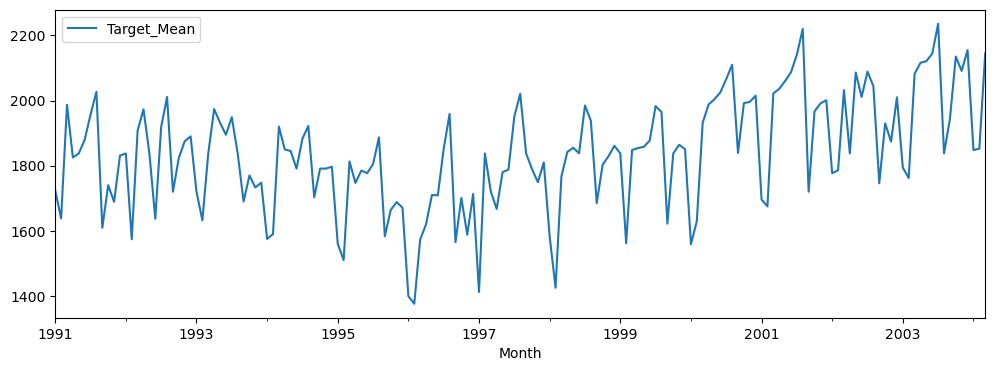

In [62]:
df.plot(figsize=(12,4), x = 'Month', y = 'Target_Mean')
plt.legend(loc="best")
plt.show(block=False)

In [65]:
df["Target_Last"] = df["Target"].fillna(method='ffill')

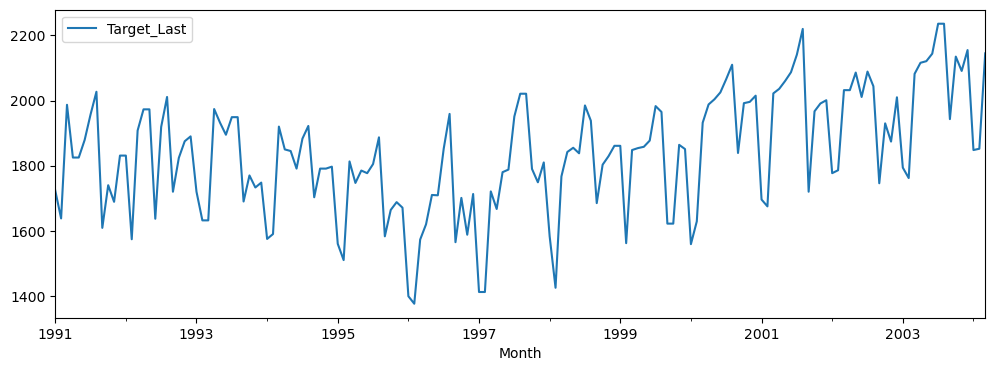

In [66]:
df.plot(figsize=(12,4), x = 'Month', y = 'Target_Last')
plt.legend(loc="best")
plt.show(block=False)

In [67]:
df.describe()

,Month,Target,Target_Mean,Target_Last
count,159,148.000000,159.000000,159.000000
mean,1997-07-31 23:14:43.018867968,1837.547297,1837.547297,1838.685535
min,1991-01-01 00:00:00,1376.000000,1376.000000,1376.000000
25%,1994-04-16 00:00:00,1718.250000,1720.500000,1716.500000
50%,1997-08-01 00:00:00,1843.500000,1837.547297,1845.000000
75%,2000-11-16 00:00:00,1976.250000,1966.000000,1978.500000
max,2004-03-01 00:00:00,2236.000000,2236.000000,2236.000000
std,NaN,177.907923,171.603212,181.136991


In [68]:
df["Target_Next"] = df["Target"].fillna(method='bfill')

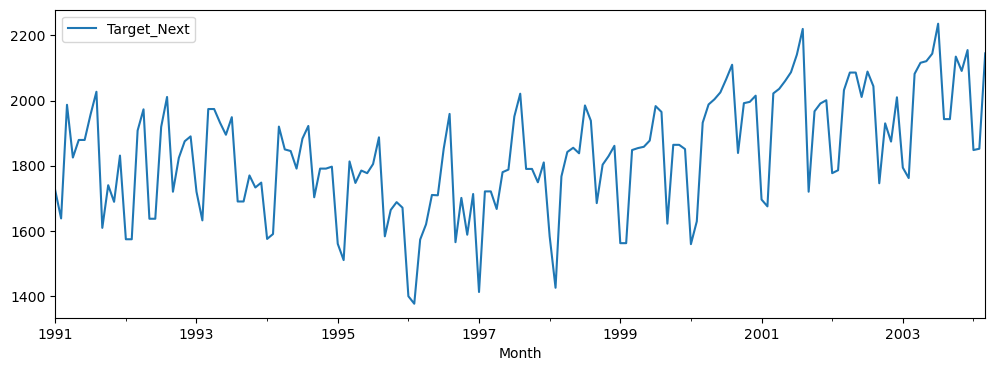

In [69]:
df.plot(figsize=(12,4), x = 'Month', y = 'Target_Next')
plt.legend(loc="best")
plt.show(block=False)

In [70]:
df.describe()

,Month,Target,Target_Mean,Target_Last,Target_Next
count,159,148.000000,159.000000,159.000000,159.000000
mean,1997-07-31 23:14:43.018867968,1837.547297,1837.547297,1838.685535,1834.446541
min,1991-01-01 00:00:00,1376.000000,1376.000000,1376.000000,1376.000000
25%,1994-04-16 00:00:00,1718.250000,1720.500000,1716.500000,1711.500000
50%,1997-08-01 00:00:00,1843.500000,1837.547297,1845.000000,1842.000000
75%,2000-11-16 00:00:00,1976.250000,1966.000000,1978.500000,1973.500000
max,2004-03-01 00:00:00,2236.000000,2236.000000,2236.000000,2236.000000
std,NaN,177.907923,171.603212,181.136991,177.327297


In [71]:
df["Target_Linear"] = df["Target"].fillna(df["Target"].interpolate(method='linear'))

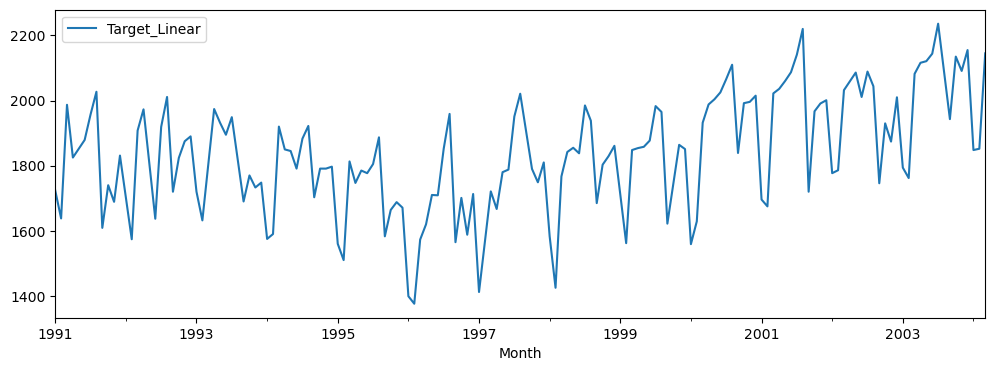

In [72]:
df.plot(figsize=(12,4), x = 'Month', y = 'Target_Linear')
plt.legend(loc="best")
plt.show(block=False)

In [73]:
df.describe()

,Month,Target,Target_Mean,Target_Last,Target_Next,Target_Linear
count,159,148.000000,159.000000,159.000000,159.000000,159.000000
mean,1997-07-31 23:14:43.018867968,1837.547297,1837.547297,1838.685535,1834.446541,1836.566038
min,1991-01-01 00:00:00,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000
25%,1994-04-16 00:00:00,1718.250000,1720.500000,1716.500000,1711.500000,1716.500000
50%,1997-08-01 00:00:00,1843.500000,1837.547297,1845.000000,1842.000000,1839.000000
75%,2000-11-16 00:00:00,1976.250000,1966.000000,1978.500000,1973.500000,1973.500000
max,2004-03-01 00:00:00,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
std,NaN,177.907923,171.603212,181.136991,177.327297,175.906973
